<a href="https://colab.research.google.com/github/itssohmoh/Simulation/blob/main/S%26M_HW1_40008893_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW1-40008893-S1**

**Q1**

Importing data from csv file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Import dataset from csv file
data = pd.read_csv('batch-yield-and-purity.csv')

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

Plotting Data

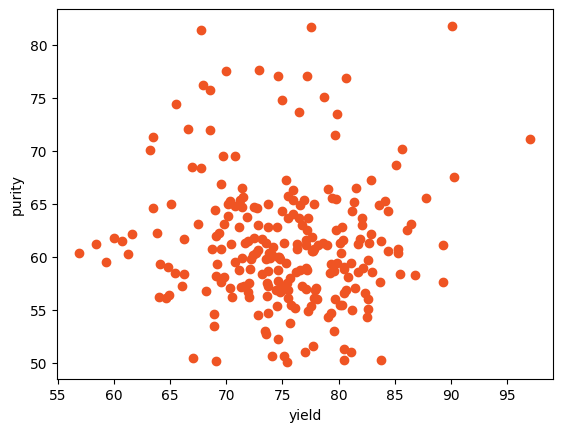

In [ ]:
#Plotting data
plt.figure(1)
plt.scatter(X, Y, color='#ef5423')
plt.xlabel('yield')
plt.ylabel('purity')
plt.show()

Least Sqaure Line Fit

m: [-0.02230883], c: [62.92659746]


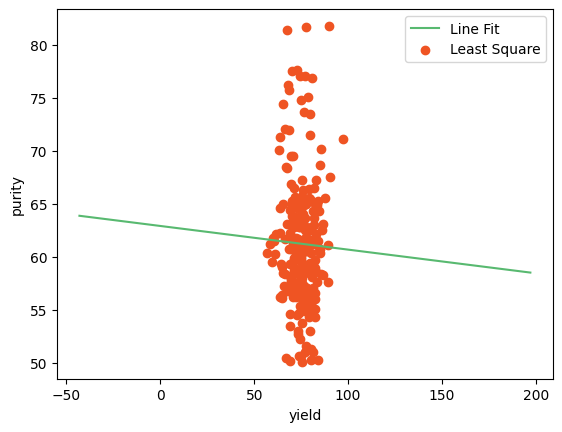

In [ ]:
#Mean calculation
mean_X = np.mean(X)
mean_y = np.mean(Y)

#Calculation of m and c (y = mx + c)
numer, denom = 0, 0
for i in range(len(X)):
    numer += (X[i] - mean_X) * (Y[i] - mean_y)
    denom += (X[i] - mean_X) ** 2
m = numer / denom
c = mean_y - (m * mean_X)

print(f"m: {m}, c: {c}")

#Plotting Values and Line Fit
max_x = np.max(X) + 100
min_x = np.min(X) - 100

L_X = np.linspace(min_x, max_x, 1000)
L_y = c + m * L_X

plt.figure(2)
plt.plot(L_X, L_y, color='#58b970', label='Line Fit')
plt.scatter(X, Y, c='#ef5423', label='Least Square')
plt.xlabel('yield')
plt.ylabel('purity')
plt.legend()
plt.show()

Least Square Error

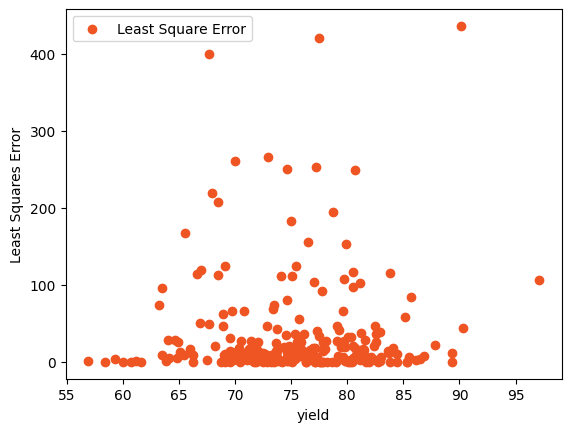

RMSE: [6.01702419]


In [ ]:
#Least Square Error
errors = []
for i in range(len(X)):
    P_y = m * X[i] + c
    error = (Y[i] - P_y) ** 2
    errors.append(error)

plt.figure(3)
plt.scatter(X, errors, c='#ef5423', label='Least Square Error')
plt.xlabel('yield')
plt.ylabel('Least Squares Error')
plt.legend()
plt.show()

#Root Mean Squares Error Calculation
rmse = 0
for i in range(len(X)):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
print(f"RMSE: {np.sqrt(rmse/len(X))}")

**Q2**

Least Square Formula Calculation

In [ ]:
import pandas as pd

dataset = pd.read_csv('batch-yield-and-purity.csv')

y = dataset.iloc[:, :-1].values
x = dataset.iloc[:, -1].values
div1, div2 = 0, 0

for i in range(len(x)):
    div1 += x[i] * x[i]
    div2 += x[i] * y[i]

print(div1)
print(div2)
print((1 / div1) * div2)

912813.8899999997
[1110081.86]
[1.21610974]


Importing dat file and show data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

In [ ]:
#Import dataset from dat file
with open('pHdata.dat', 'r') as file:
    content = file.read()
    print(type(content))

    data = StringIO(content)
    df = pd.read_csv(data, sep='   ', header=None)
    print(df)

<class 'str'>
           0          1         2          3
0        1.0   8.875837  1.000000   6.912909
1        2.0  11.025642  1.000000  10.839350
2        3.0   9.461355  1.000000  10.894930
3        4.0  11.930201  1.000000  10.955416
4        5.0  10.890642  1.000000  10.969890
...      ...        ...       ...        ...
1996  1997.0  12.000000  1.076854  10.948350
1997  1998.0  12.000000  1.536137  10.979263
1998  1999.0  12.000000  1.663987  11.017650
1999  2000.0  12.000000  1.758542  11.003071
2000  2001.0  12.000000  1.383535  11.004373

[2001 rows x 4 columns]


<ipython-input-11-05634a513fa9>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(data, sep='   ', header=None)


Plotting data

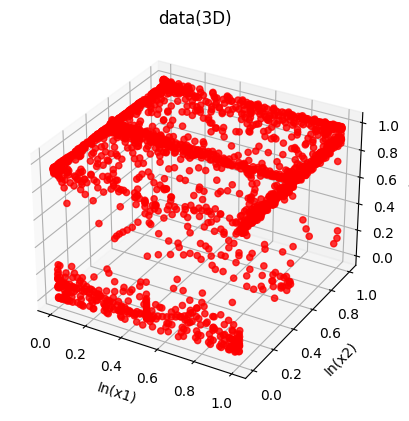

In [ ]:
#Numeric arrays from dat file (Input 1 & 2, Output, Time Step)
x1 = df.iloc[:, 1].values
x2 = df.iloc[:, 2].values
y = df.iloc[:, 3].values
t = df.iloc[:, 0].values

#Normalizing
x1 = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
x2 = (x2 - np.min(x2)) / (np.max(x2) - np.min(x2))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
t = (t - np.min(t)) / (np.max(t) - np.min(t))

#Plotting 3D contains 2 inputs and output
fig = plt.figure(1)
ax = plt.axes(projection = '3d')
sctt = ax.scatter3D(x1, x2, y, alpha = 0.8, color = 'red')
plt.title('data(3D)')
ax.set_xlabel('In(x1)')
ax.set_ylabel('In(x2)')
ax.set_zlabel('In(y)')
plt.show()

Least Square Line Fit

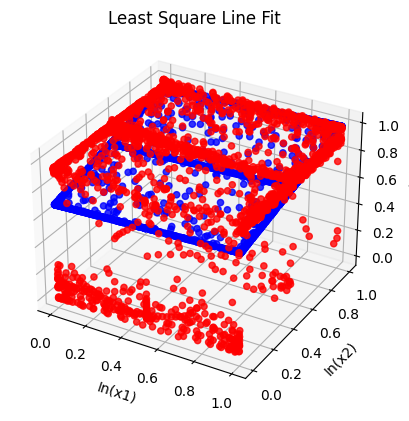

In [ ]:
#Least Square
X = np.column_stack((np.ones_like(x1), x1**4, x2**4))
theta = np.linalg.pinv(X) @ y
theta1 = np.linalg.lstsq(X, y, rcond=None)[0]

intercept = theta[0]
slope_x1 = theta[1]
slope_x2 = theta[2]

#Plotting LS
fig = plt.figure(2)
ax = plt.axes(projection = '3d')
y_fit = intercept + slope_x1 * x1 + slope_x2 * x2

ax.scatter3D(x1, x2, y_fit, alpha = 0.8, color = 'blue')
ax.scatter3D(x1, x2, y, alpha = 0.8, color = 'red')

plt.title('Least Square Line Fit')
ax.set_xlabel('In(x1)')
ax.set_ylabel('In(x2)')
ax.set_zlabel('In(y)')
plt.show()

Plotting Error

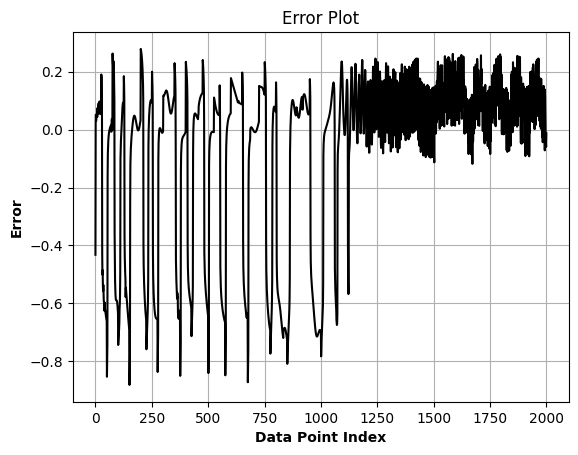

In [ ]:
# # Error Plot = Actual Value - Fitted Value (y - y-fit)
y_fit = intercept + slope_x1 * x1 + slope_x2 * x2
E = y - y_fit

plt.figure(3)
plt.plot(E, 'k', linewidth=1.5)
plt.xlabel('Data Point Index', fontweight = 'bold')
plt.ylabel('Error', fontweight = 'bold')
plt.title('Error Plot')
plt.grid()

Plotting Error with Forgetting Factor

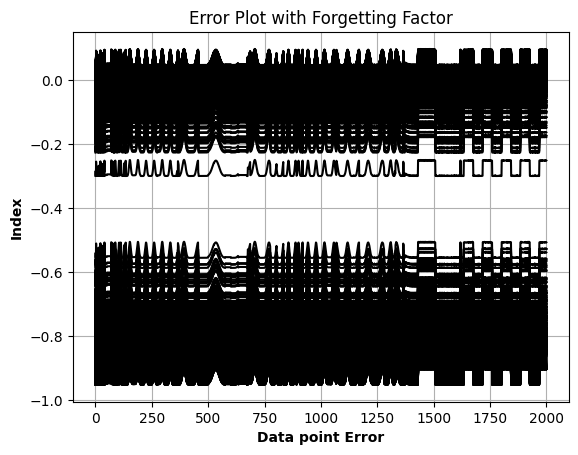

In [ ]:
# # Forgetting Factor (0.7 < lambda < 0.9)
_lambda = 0.9
theta = np.zeros((X.shape[1], 1))
P = np.eye(X.shape[1]) / _lambda

#All available data points
for i in range(len(y)):
    x_i = X[i, :].reshape(-1, 1)
    y_predicted = x_i.T @ theta
    e = y[i] - y_predicted
    K = P @ x_i / (_lambda + x_i.T @ P @ x_i)
    theta = theta + K * e
    P = (P - K @ x_i.T @ P) / _lambda

#Error = Actual Value - Fitted Value with Forgetting Factor
y_fit = X @ theta
E = y - y_fit

plt.figure(4)
plt.plot(E, 'k', linewidth=1.5)
plt.xlabel('Data point Error', fontweight = 'bold')
plt.ylabel('Index', fontweight = 'bold')
plt.title('Error Plot with Forgetting Factor')
plt.grid(True)
plt.show()

Sliding Window Parameters

In [ ]:
# # Sliding Window
Window_size = 50
Step_size = 1
num_points = len(y)
num_windows = (num_points - Window_size) // Step_size + 1
intercepts = np.zeros(num_windows)
slope_x1 = np.zeros(num_windows)
slope_x2 = np.zeros(num_windows)
errors = np.zeros((num_windows, Window_size))

Sliding Window Least Square Line Fit

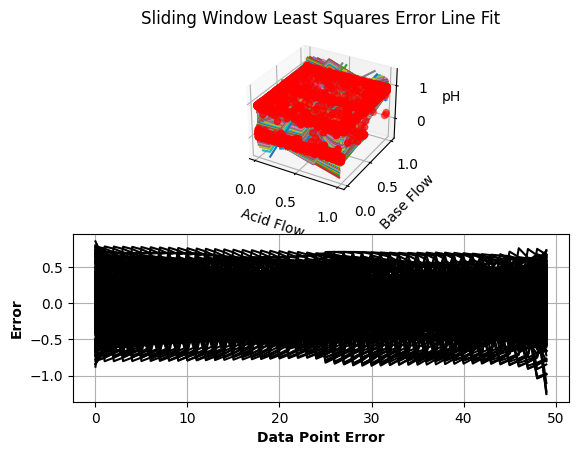

In [ ]:
#Sliding Window Least Square
for i in range(num_windows):
    start_idx = (i * Step_size)
    end_idx = start_idx + Window_size

    x1_window = x1[start_idx:end_idx]
    x2_window = x2[start_idx:end_idx]
    y_window = y[start_idx:end_idx]

    X_window = np.column_stack((np.ones_like(x1_window), x1_window, x2_window))
    theta_window = np.linalg.pinv(X_window) @ y_window
    intercepts[i] = theta_window[0]
    slope_x1[i] = theta_window[1]
    slope_x2[i] = theta_window[2]

    y_fit_window = X_window @ theta_window

    errors[i, :] = y_window - y_fit_window

fig = plt.figure(5)
ax1 = fig.add_subplot(211, projection='3d')

for i in range(num_windows):
    x1_window = x1[i * Step_size:i * Step_size + Window_size]
    x2_window = x2[i * Step_size:i * Step_size + Window_size]
    y_fit = intercepts[i] + slope_x1[i] * x1_window + slope_x2[i] * x2_window
    ax1.plot(x1_window, x2_window, y_fit)

ax1.scatter(x1, x2, y, c='r', marker='o')
ax1.set_xlabel('Acid Flow')
ax1.set_ylabel('Base Flow')
ax1.set_zlabel('pH')
ax1.set_title('Sliding Window Least Squares Error Line Fit')

ax2 = fig.add_subplot(212)
ax2.plot(errors.T, 'k', linewidth=1.5)
ax2.set_xlabel('Data Point Error', fontweight = 'bold')
ax2.set_ylabel('Error', fontweight = 'bold')
plt.grid(True)
plt.show()

**Q3**

RLS Parameters

In [ ]:
# # RLS for Sliding Window
Window_Size = 50
Step_Size = 1

#Parameters
intercepts = np.zeros(len(y) - Window_Size + 1)
slope_x1 = np.zeros(len(y) - Window_Size + 1)
slope_x2 = np.zeros(len(y) - Window_Size + 1)

errors = np.zeros((len(y) - Window_Size + 1, Window_Size))

for i in range(len(y) - Window_Size + 1):
    x1_window = x1[i:i + Window_Size]
    x2_window = x2[i:i + Window_Size]
    y_window = y[i:i + Window_Size]

    P = np.eye(3)
    theta = np.zeros((3, 1))
    window_errors = np.zeros(Window_Size)

    for j in range(Window_Size):
        x = np.array([[1], [x1_window[j]], [x2_window[j]]])
        e = y_window[j] - x.T @ theta
        K = (P @ x) / (1 + x.T @ P @ x)
        theta = theta + K * e
        P = P - K @ x.T @ P
        window_errors[j] = e

    errors[i, :] = window_errors

<ipython-input-19-a8e3dd040ad3>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  window_errors[j] = e
<ipython-input-19-a8e3dd040ad3>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  window_errors[j] = e


Plotting RLS Line Fit & Error

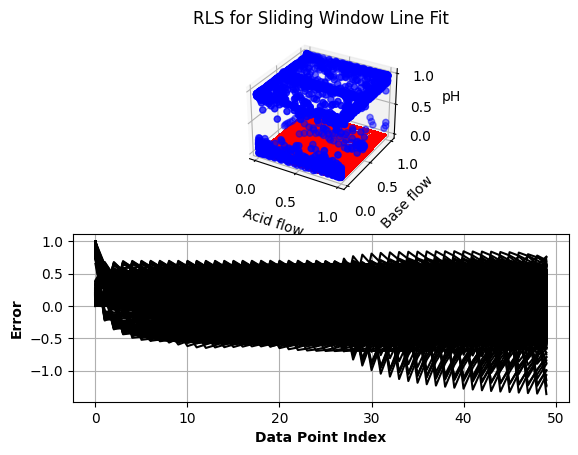

In [ ]:
#Plotting Sliding Window RLS
#Error (y - y-fit)
fig = plt.figure(1)
ax1 = fig.add_subplot(211, projection='3d')

for i in range(len(y) - Window_Size + 1):
    x1_window = x1[i:i + Window_Size]
    x2_window = x2[i:i + Window_Size]
    y_fit = intercepts[i] + slope_x1[i] * x1_window + slope_x2[i] * x2_window
    ax1.plot(x1_window, x2_window, y_fit, 'r')

ax1.scatter(x1, x2, y, c='b', marker='o')
ax1.set_xlabel('Acid flow')
ax1.set_ylabel('Base flow')
ax1.set_zlabel('pH')
ax1.set_title('RLS for Sliding Window Line Fit')

ax2 = fig.add_subplot(212)
ax2.plot(errors.T, 'k', linewidth=1.5)
ax2.set_xlabel('Data Point Index', fontweight = 'bold')
ax2.set_ylabel('Error', fontweight = 'bold')
plt.grid(True)
plt.show()